In [1]:
import pandas as pd
import numpy as np
from datascience import *
from datascience import Table
import matplotlib
from ipywidgets import interact, Dropdown


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Covid-19

## The Data Science Life Cycle - Table of Contents

<a href='#section 0'>Background Knowledge: Spread of Disease</a>

<a href='#subsection 1a'>Formulating a question or problem</a> 

<a href='#subsection 1b'>Acquiring and preparing data</a>

<a href='#subsection 1c'>Conducting exploratory data analysis</a>

<a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

## Background<a id='section 0'></a>


In March 2020, our lives were turned upside down as the COVID-19 virus spread throughout the United States.  The Centers for Disease Control (CDC) collects data to help health scientists better understand how disease spreads.

Making comparisons between counties and states can us understand how rapidly a virus spreads, the impact of restrictions on public gatherings on the spread of a virus, and measure the changes in fatality as the medical profession learns how to treat the virus and as people get vaccinated. 

## Formulating a question or problem <a id='subsection 1a'></a>

It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about Covid-19, for example, many researchers use data to predict the outcomes based on intervention techniques such as social distancing.

<div class="alert alert-info">
<b>Question:</b> Take some time to formulate questions you have about this pandemic and the data you would need to answer the questions. In addition, add the link of an article you found interesting with a description an why it interested you. 
   </div>

**Your questions:** *here*

**Data you would need:** *here*


**Article:** *link*

## Acquiring and preparing data <a id='subsection 1b'></a>

You will be looking at data from the COVID-19 Data Repository at Johns Hopkins University. You can find the raw data [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). 

You will be investigating the cumulative number of cases, new cases, and fatalities in a month for counties in states accross the US, from March 2020 to May 2021.

The following table, `covid_data`, contains the data collected for each month from March 2020 through May 2021 for every county in the United States.

In [14]:
covid_data = Table().read_table("data/covid_timeseries.csv")

Here are some of the important fields in our data set that you will focus on:

|Variable Name   | Description |
|:---|:---|
|Admin2 | County name |
|Province_State | State name |
|month| Reporting month represented as the last day of the month, e.g., 3.31.20 |
|total_cases | Cumulative number of COVID cases |
|month_cases| New cases reported in the month |
|total_fatalities | Cumulative number of fatal COVID cases |
|month_fatalities| New fatal cases reported in the month |
|Population | Population in the county |

Let's take a look at the data.

In [3]:
# Run this cell show the first ten rows of the data
covid_data.show(10)

iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,month,cases,cases_new,Population,fatalities,fatalities_new
USA,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",3/20,8,8,55869,0,0
USA,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin, Alabama, US",3/20,23,23,223234,1,1
USA,1005,Barbour,Alabama,US,31.8683,-85.3871,"Barbour, Alabama, US",3/20,0,0,24686,0,0
USA,1007,Bibb,Alabama,US,32.9964,-87.1251,"Bibb, Alabama, US",3/20,3,3,22394,0,0
USA,1009,Blount,Alabama,US,33.9821,-86.5679,"Blount, Alabama, US",3/20,7,7,57826,0,0
USA,1011,Bullock,Alabama,US,32.1003,-85.7127,"Bullock, Alabama, US",3/20,2,2,10101,0,0
USA,1013,Butler,Alabama,US,31.753,-86.6806,"Butler, Alabama, US",3/20,1,1,19448,0,0
USA,1015,Calhoun,Alabama,US,33.7748,-85.8263,"Calhoun, Alabama, US",3/20,10,10,113605,0,0
USA,1017,Chambers,Alabama,US,32.9136,-85.3907,"Chambers, Alabama, US",3/20,40,40,33254,4,4
USA,1019,Cherokee,Alabama,US,34.1781,-85.6064,"Cherokee, Alabama, US",3/20,1,1,26196,0,0


<div class="alert alert-info">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? 
</div>

In [18]:
total_rows = covid_data.num_rows
total_rows

48570

**Your answer here:**

<div class="alert alert-info">
<b>Question:</b> What does each row represent?
   </div>    

**Your answer here:**

<div class="alert alert-info">
<b>Question:</b> This table has many columns that are not particularly informative for our investigation. Which ones can we ignore? Which ones do we need to keep for our analysis?  
</div>

**Your answer here:**

Before we eliminate these columns, let's take a look at some of them to confirm that we don't need them.

It looks like `iso3` has only the value "USA" and that `Country_Region` is always "US". Let's check that this is the case by grouping on each of these columns.

In [4]:
covid_data.group('iso3')

iso3,count
ASM,15
GUM,15
MNP,15
PRI,1170
USA,47340
VIR,15


In [5]:
covid_data.group('Country_Region')

Country_Region,count
US,48570


<div class="alert alert-info">
<b>Question:</b> What did you learn? 
Try searching on the Internet to find out about these iso3 codes. 
What are they?
   </div> 

**Your answer here:**

We are primarily interested in the COVID cases in the states. 
Select the rows that correspond to states.

In [12]:
covid_us = covid_data.where('iso3','USA')
covid_us.show(10)


iso3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,month,cases,cases_new,Population,fatalities,fatalities_new
USA,1001,Autauga,Alabama,US,32.5395,-86.6441,"Autauga, Alabama, US",3/20,8,8,55869,0,0
USA,1003,Baldwin,Alabama,US,30.7277,-87.7221,"Baldwin, Alabama, US",3/20,23,23,223234,1,1
USA,1005,Barbour,Alabama,US,31.8683,-85.3871,"Barbour, Alabama, US",3/20,0,0,24686,0,0
USA,1007,Bibb,Alabama,US,32.9964,-87.1251,"Bibb, Alabama, US",3/20,3,3,22394,0,0
USA,1009,Blount,Alabama,US,33.9821,-86.5679,"Blount, Alabama, US",3/20,7,7,57826,0,0
USA,1011,Bullock,Alabama,US,32.1003,-85.7127,"Bullock, Alabama, US",3/20,2,2,10101,0,0
USA,1013,Butler,Alabama,US,31.753,-86.6806,"Butler, Alabama, US",3/20,1,1,19448,0,0
USA,1015,Calhoun,Alabama,US,33.7748,-85.8263,"Calhoun, Alabama, US",3/20,10,10,113605,0,0
USA,1017,Chambers,Alabama,US,32.9136,-85.3907,"Chambers, Alabama, US",3/20,40,40,33254,4,4
USA,1019,Cherokee,Alabama,US,34.1781,-85.6064,"Cherokee, Alabama, US",3/20,1,1,26196,0,0


Now how many rows remain?

In [8]:
covid_us.num_rows

47340

Drop the columns: `iso3`, `Country_Region`, `Lat`, `Long_'`, `Combined_Key`

Keep the column `FIPS` because it uniquely identifies a county. For example, Montana and Wyoming both have a county called "Big Horn". 

Next week, we will make maps, and then the columns `Lat` and `Long_` will be useful, but until then, drop them. 

In [19]:
cols_to_drop = ["iso3", "Country_Region", "Lat", "Long_", "Combined_Key"]

covid_us = covid_us.drop(cols_to_drop)

covid_us.show(10)

FIPS,Admin2,Province_State,month,cases,cases_new,Population,fatalities,fatalities_new
1001,Autauga,Alabama,3/20,8,8,55869,0,0
1003,Baldwin,Alabama,3/20,23,23,223234,1,1
1005,Barbour,Alabama,3/20,0,0,24686,0,0
1007,Bibb,Alabama,3/20,3,3,22394,0,0
1009,Blount,Alabama,3/20,7,7,57826,0,0
1011,Bullock,Alabama,3/20,2,2,10101,0,0
1013,Butler,Alabama,3/20,1,1,19448,0,0
1015,Calhoun,Alabama,3/20,10,10,113605,0,0
1017,Chambers,Alabama,3/20,40,40,33254,4,4
1019,Cherokee,Alabama,3/20,1,1,26196,0,0


Let's give the remaining columns simpler, more meaningful names.

In [20]:
old_names = ['Admin2', 'Province_State', 'month']
new_names = ['County', 'State', 'Date']

In [21]:
covid_us = covid_us.relabel(old_names, new_names)

In [23]:
covid_us.show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
1001,Autauga,Alabama,3/20,8,8,55869,0,0
1003,Baldwin,Alabama,3/20,23,23,223234,1,1
1005,Barbour,Alabama,3/20,0,0,24686,0,0
1007,Bibb,Alabama,3/20,3,3,22394,0,0
1009,Blount,Alabama,3/20,7,7,57826,0,0
1011,Bullock,Alabama,3/20,2,2,10101,0,0
1013,Butler,Alabama,3/20,1,1,19448,0,0
1015,Calhoun,Alabama,3/20,10,10,113605,0,0
1017,Chambers,Alabama,3/20,40,40,33254,4,4
1019,Cherokee,Alabama,3/20,1,1,26196,0,0


<div class="alert alert-info">
<b>Question:</b> It's important to evalute our data source. What do you know about Johns Hopkins University? What motivations do they have for collecting this data? What data is missing?
   </div>

**Your answer here:**

## Conducting exploratory data analysis <a id='subsection 1c'></a>

Often when we begin our explorations, we first narrow down the data to explore. For example, we might choose a particular month to examine, or a particular state, or both. To get us started, let's narrow our exploartions to the first month, March 2020. Of course, you may choose to examine a different month.

Visualizations help us to understand what the data is telling us. 

Also, the method of comparison is a common and powerful tool to help us understand the data. For example, we might want to compare the counties with the most confirmed cases via a bar chart. 

### Cases in March, 2020


To explore the counties that had the highest number of cases in March 2020, we will need to first select the rows in the table that correspond to March, 2020. 

In [32]:
covid_mar20 = covid_us.where('Date', '3/20')

In [33]:
covid_mar20.show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
1001,Autauga,Alabama,3/20,8,8,55869,0,0
1003,Baldwin,Alabama,3/20,23,23,223234,1,1
1005,Barbour,Alabama,3/20,0,0,24686,0,0
1007,Bibb,Alabama,3/20,3,3,22394,0,0
1009,Blount,Alabama,3/20,7,7,57826,0,0
1011,Bullock,Alabama,3/20,2,2,10101,0,0
1013,Butler,Alabama,3/20,1,1,19448,0,0
1015,Calhoun,Alabama,3/20,10,10,113605,0,0
1017,Chambers,Alabama,3/20,40,40,33254,4,4
1019,Cherokee,Alabama,3/20,1,1,26196,0,0


<div class="alert alert-info">
<b>Question:</b> Next, sort the dataset to show the counties with the highest number of new cases for that month.   
    
   </div>

In [34]:
new_cases_sorted = covid_mar20.sort('cases_new', descending=True)
new_cases_sorted

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
36081,Queens,New York,3/20,13691,13691,2253858,660,660
36047,Kings,New York,3/20,11917,11917,2559903,662,662
36119,Westchester,New York,3/20,9967,9967,967506,10,10
36059,Nassau,New York,3/20,8544,8544,1356924,48,48
36005,Bronx,New York,3/20,7766,7766,1418207,465,465
36061,New York,New York,3/20,6876,6876,1628706,292,292
36103,Suffolk,New York,3/20,6713,6713,1476601,44,44
17031,Cook,Illinois,3/20,4496,4494,5150233,61,61
26163,Wayne,Michigan,3/20,3752,3752,1749343,142,142
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54


<div class="alert alert-info">
<b>Question:</b> Now, cut down the table to only have the top twenty from sorted_cases above.
   </div>

In [ ]:
top_twenty = new_cases_sorted...(np.arange(20))
top_twenty

In [35]:
#KEY
top_twenty = new_cases_sorted.take(np.arange(20))
top_twenty

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
36081,Queens,New York,3/20,13691,13691,2253858,660,660
36047,Kings,New York,3/20,11917,11917,2559903,662,662
36119,Westchester,New York,3/20,9967,9967,967506,10,10
36059,Nassau,New York,3/20,8544,8544,1356924,48,48
36005,Bronx,New York,3/20,7766,7766,1418207,465,465
36061,New York,New York,3/20,6876,6876,1628706,292,292
36103,Suffolk,New York,3/20,6713,6713,1476601,44,44
17031,Cook,Illinois,3/20,4496,4494,5150233,61,61
26163,Wayne,Michigan,3/20,3752,3752,1749343,142,142
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54


<div class="alert alert-info">
<b>Question:</b> Next, create a bar chart to visualize the comparison between the top_ten counties for the number of cases in March, 2020.
   </div>

In [ ]:
top_twenty...("...", "...")

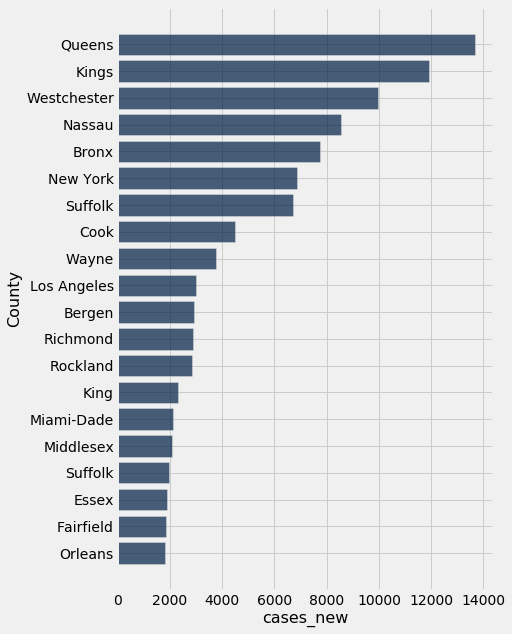

In [36]:
top_twenty.barh("County", "cases_new")

<div class="alert alert-info">
<b>Question:</b> Do you recognize the counties? Where are the most of these counties? Why might this be the case?
</div>

**Your answer here:**

## Cases pers 100,000 people

There is more than one way to measure the severity of the pandemic. Rather than looking at pure counts, we may want to adjust it according to how many people are in the county. For example, a county with 6,000 people, half of whom are sick, would not appear in the top 10 counties that we calculated. For this reason, we also want to compare the rates. We could calculate the percentage of cases in the population:

$$100 * cases/population$$


The percentage represents the average number of cases per 100 people. When percentages are small, we often use rates per 10,000 or 100,000 people, i.e.,

$$100000 * cases/population$$

Let's find the top 20 counties that have highest number of cases per 100,000. 

<div class="alert alert-info">
<b>Question:</b>  Which 20 counties that have highest number of cases per 100,000 people?
</div>

As a first step, we drop the counties that don't have a value for population. If you want, you can dig deeper and see which counties these are. It's just a hand full.

In [37]:
covid_mar20 = covid_mar20.where(covid_mar20['Population'] > 0)

<div class="alert alert-info">
<b>Question:</b> Add a column called "cases_new_per100k" that has the number of cases in a county in March 2020 divided by the population of the county.
   </div>

In [39]:
covid_mar20['cases_per100k'] = 100000 * covid_mar20['cases_new'] / covid_mar20['Population']

In [40]:
cases_per100k_sorted = covid_mar20.sort('cases_per100k', descending=True)
cases_per100k_sorted

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
36119,Westchester,New York,3/20,9967,9967,967506,10,10,1030.17
36087,Rockland,New York,3/20,2863,2863,325789,8,8,878.79
16013,Blaine,Idaho,3/20,192,192,23021,2,2,834.021
36059,Nassau,New York,3/20,8544,8544,1356924,48,48,629.659
36081,Queens,New York,3/20,13691,13691,2253858,660,660,607.447
36085,Richmond,New York,3/20,2889,2889,476143,113,113,606.75
36005,Bronx,New York,3/20,7766,7766,1418207,465,465,547.593
13095,Dougherty,Georgia,3/20,462,462,87956,18,18,525.263
22071,Orleans,Louisiana,3/20,1834,1834,390144,101,101,470.083
8051,Gunnison,Colorado,3/20,82,82,17462,1,1,469.591


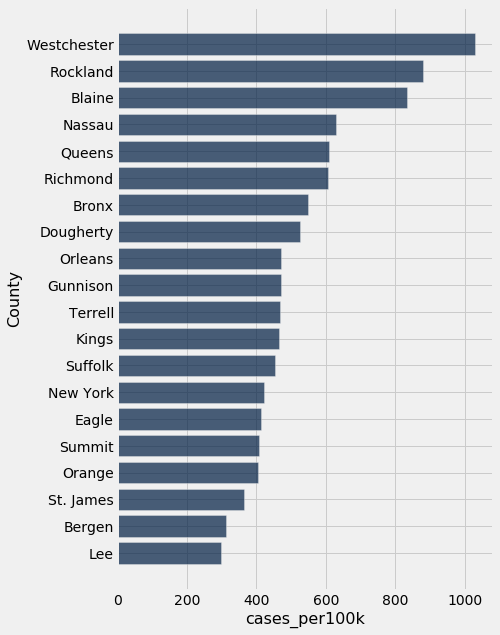

In [41]:
top_twenty_per100k = cases_per100k_sorted.take(np.arange(20))
top_twenty_per100k.barh("County", "cases_per100k")

<div class="alert alert-info">
<b>Question:</b> What are some possible reasons for the disparities in the counties shown in these two bar plots? Hint: Think about the size of the counties.
   </div>

*Insert answer here.*

### Monthly changes 

These data have the number of new cases of COVID each month from March 2020 through May 2021. Another possible exploration is to see how a county's cases change in time.

Let's start by exploring one county in California

<div class="alert alert-info">
<b>Question:</b> First, return a table that only has the data for California counties. Then, select the county that you are interested in from the California table. 
   </div>

In [ ]:
ca_counties = covid_us.where("...", "...")
ca_counties.show(10)

In [46]:
#KEY
ca_counties = covid_us.where("State", "California")
ca_counties.sort('cases_new', descending = True).show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new
6037,Los Angeles,California,12/20,771519,370071,10039107,10359,2703
6037,Los Angeles,California,1/21,1116948,345429,10039107,16770,6411
6071,San Bernardino,California,12/20,194377,100706,2180085,1591,368
6059,Orange,California,12/20,182684,94732,3175692,1875,298
6037,Los Angeles,California,11/20,401448,93830,10039107,7656,585
6065,Riverside,California,12/20,180553,93170,2470546,1985,543
6065,Riverside,California,1/21,271910,91357,2470546,3091,1106
6037,Los Angeles,California,7/20,188541,84691,10039107,4624,1253
6073,San Diego,California,1/21,238042,82447,3338330,2619,1085
6071,San Bernardino,California,1/21,274429,80052,2180085,2122,531


In [47]:
ca_counties['cases_per100k'] = 100000 * ca_counties['cases_new'] / ca_counties['Population']
ca_counties.sort('cases_per100k', descending=True).show(10)

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
6035,Lassen,California,12/20,4691,2531,30573,10,7,8278.55
6005,Amador,California,12/20,2515,1877,39752,24,8,4721.78
6071,San Bernardino,California,12/20,194377,100706,2180085,1591,368,4619.36
6035,Lassen,California,11/20,2160,1383,30573,3,2,4523.6
6003,Alpine,California,11/20,51,43,1129,0,0,3808.68
6065,Riverside,California,12/20,180553,93170,2470546,1985,543,3771.23
6065,Riverside,California,1/21,271910,91357,2470546,3091,1106,3697.85
6037,Los Angeles,California,12/20,771519,370071,10039107,10359,2703,3686.29
6071,San Bernardino,California,1/21,274429,80052,2180085,2122,531,3671.97
6111,Ventura,California,1/21,69931,30372,846006,598,335,3590.05


In [48]:
#select_counties = ["Los Angeles", "Alameda", "Orange", "San Bernardino", "Kern"]


select_counties = ["Los Angeles"]

#This will take the counties you choose for the comparison.
my_county = ca_counties.where("County", are.contained_in(select_counties))
my_county

FIPS,County,State,Date,cases,cases_new,Population,fatalities,fatalities_new,cases_per100k
6037,Los Angeles,California,3/20,3019,3018,10039107,54,54,30.0624
6037,Los Angeles,California,4/20,23220,20201,10039107,1111,1057,201.223
6037,Los Angeles,California,5/20,55001,31781,10039107,2362,1251,316.572
6037,Los Angeles,California,6/20,103850,48849,10039107,3371,1009,486.587
6037,Los Angeles,California,7/20,188541,84691,10039107,4624,1253,843.611
6037,Los Angeles,California,8/20,241768,53227,10039107,5784,1160,530.197
6037,Los Angeles,California,9/20,270299,28531,10039107,6576,792,284.199
6037,Los Angeles,California,10/20,307618,37319,10039107,7071,495,371.736
6037,Los Angeles,California,11/20,401448,93830,10039107,7656,585,934.645
6037,Los Angeles,California,12/20,771519,370071,10039107,10359,2703,3686.29


<div class="alert alert-info">
<b>Question:</b> Now make a line plot to see how the number of cases changes from March 2020 to May 2021.
   </div>

In [53]:
# FIX: CONVERT String to date 
# 

In [ ]:
# Use this cell to make a line chart of new cases each month 
...

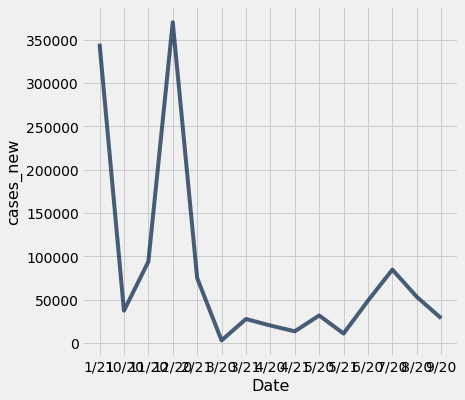

In [49]:
#KEY
my_county.plot("Date", "cases_new")
# FIX so that the Dates are in the correct order. 

<div class="alert alert-info">
<b>Question:</b> Can you use your knowledge about the context to describe the peeks in the cases? 
   </div>

# Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have some experience making and reading visualizations, let's compare a few counties over time. 

Settle on a few counties to examine. They could all be in California, or in different states. 

Decide whether the comparison should be of new cases, cumulative cases, new cases per 100,000, or cumulative cases per 100,000. 

Make line plots for the counties you have selected and 

Now we will read in two tables: Covid by State and Population by state in order to look at the percentage of the cases. And the growth of the 

In [50]:
#FIX: NEED CODE SNIPPETS FOR THIS

Tell us something interesting about this data.

Tell us what you learned about the counties that you chose.